In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import sys
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



Using TensorFlow backend.


In [2]:
ldt=pd.read_csv('yahoostock.csv')
ldta=ldt[['Open']]
ldtx=ldt[['Open','High','Low','Volume','Adj Close']]
ldty=ldt[['Close']]
ldto=ldty.iloc[0:100,:]
ldto=ldto[::-1]
ldtp=ldtx.iloc[:100,:]
ldtp=ldtp[::-1]

In [3]:
lf=linear_model.LinearRegression()

In [4]:
ltrainx,ltestx,ltrainy,ltesty=train_test_split(ldtx,ldty,test_size=0.1,random_state=4)

In [5]:
lf.fit(ltrainx,ltrainy)
linearoutcome=lf.predict(ldtp)

In [6]:
stock=pd.read_csv('yahoostock.csv')
df=pd.DataFrame(stock)
df.drop(df.columns[[0,1,4,6,7]], axis=1, inplace=True) 
aa=df.iloc[:100,]



In [7]:
def load_data(stock, seq_len):
    check=stock[::-1]
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    sa=round( result.shape[0])
    sz=int(sa)-100
    row = round(0.9 * result.shape[0])
    asd=result[int(sz):int(sa),:]
    train = result[:int(row), :]
    tpre=asd[:,:-1]
    tout=result[int(sz):,-1][:,-1]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]
    tpre= np.reshape(tpre,(tpre.shape[0],tpre.shape[1],amount_of_features))
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test,tpre,tout]


In [8]:
def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [9]:
window = 5
X_train, y_train, X_test, y_test,tpre,tout = load_data(df[::-1], window)
model = build_model2([3,window,1])

C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  
C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':


In [10]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=500,
    validation_split=0.1,
    verbose=0)



C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


In [11]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
testScore = model.evaluate(X_test, y_test, verbose=0)
diff=[]
ratio=[]
lstmoutcome=model.predict(tpre)
for u in range(len(tout)):
    pr = lstmoutcome[u][0]
    ratio.append((tout[u]/pr)-1)
    diff.append(abs(tout[u]- pr))


In [12]:
sopening = []
sclose = []
sx=[]
sa=[]
svmoutcome=[]

In [13]:
def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	
		for row in csvFileReader:
			sopening.append(float(row[2]))
			sclose.append(float(row[5]))
	return

In [14]:
get_data('yahoostock.csv') 




In [15]:
def predict_price(sopening,sclose, y):
    sopening = np.reshape(sopening,(len(sopening), 1))
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
    sx=[y]
    sx=np.reshape(sx,(len(sx),1))
    svr_rbf.fit(sopening, sclose)
    return svr_rbf.predict(sx)

 



In [16]:
for u in range(100):
    svmoutcome.append(predict_price(sopening,sclose,sopening[99-u]))


   

In [17]:

for u in range(99):
    sa.append(sclose[99-u])

In [18]:
import matplotlib.pyplot as plt2

In [19]:
w1=2
w2=1
w3=3

In [20]:
count=0
original=0

In [21]:
ensembled=[]
for i in range(len(sa)):
    ensembled.append((((svmoutcome[i]*float(w1))+(lstmoutcome[i]*float(w2))+(linearoutcome[i]*float(w3)))/float(w1+w2+w3)))

In [22]:
for i in range(len(sa)):
    if (ensembled[i]>sa[i]):
        count=((ensembled[i]-sa[i])/sa[i])
        original=original+count
    if (ensembled[i]<sa[i]):
        count=((sa[i]-ensembled[i])/sa[i])
        original=original+count

       
t=100-((original/len(sa))*100)
print("Accuracy",t)

Accuracy [99.09666476]


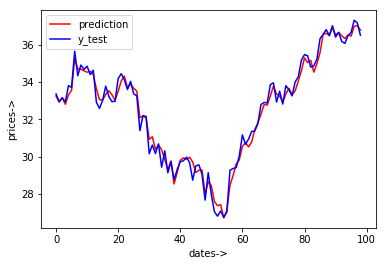

In [23]:
import matplotlib.pyplot as plt2
plt2.plot(ensembled,color='red', label='prediction')
plt2.plot(sa,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.xlabel('dates->')
plt2.ylabel('prices->')
plt2.show()